# Introduction

Let me introduce every content with a question to give a sense of purpose behind everything.  

### Question: What is the difference or relation between Statistics and Probability  
ANSWER: A naive anwer would be just to give a broad broad implication of applications of Statistics and Probabilit is :  
The problems considered by probability and statistics are inverse to each other. In **probability** theory we consider some underlying process which has some randomness or uncertainty modeled by random variables, and we figure out what happens. In **statistics** we observe something that has happened, and try to figure out what underlying process would explain those observations.  

**Why **

### Qustion:While trying to estimate a posterior probability using Bayes theorem why people end up going into Monte Carlo and Markov Chain Monte Carlo sampling for approximating the posterior probability?  
ANSWER: This will be a long answer

In Bayesian statistics, the distribution representing our beliefs about a parameter is called the prior distribution, because it captures our beliefs prior to seeing any data. The likelihood distribution summarizes what the observed data are telling us, by representing a range of parameter values accompanied by the likelihood that each each parameter explains the data we are observing. Estimating the parameter value that maximizes the likelihood distribution is just answering the question  

In the case of two bell curves, solving for the posterior distribution is very easy. There is a simple equation for combining the two. But what if our prior and likelihood distributions weren’t so well-behaved? Sometimes it is most accurate to model our data or our prior beliefs using distributions which don’t have convenient shapes. What if our likelihood were best represented by a distribution with two peaks, and for some reason we wanted to account for some really wacky prior distribution?   

There exists some posterior distribution that gives the likelihood for each parameter value. But its a little hard to see what it might look like, and it is impossible to solve for analytically. Enter MCMC methods. MCMC methods allow us to estimate the shape of a posterior distribution in case we can’t compute it directly. MCMC stands for Markov chain Monte Carlo methods. 

To understand how they work, I’m going to introduce Bayesian Theorem, Monte Carlo simulations, Markov chains and Markov Chain Monte Carlo

**Bayes' Theorem**
 
$ P(A|B)=\frac{P(B|A).P(A)}{P(B)}$

where  
P(A)   is called the prior   
P(A|B) is called the post  
P(B|A)/P(B) is called the likelihood.   

post = prior*likelihood  

**Example of Bayes' Theorem:**  
PROBLEM: There are 4 coins and one is biased with 75% probability heads. You randomly pick one and toss the coin twice and you got heads in the firs toss and tails in the second toss. What is the probability of coin being fair if the last two toss out come was Head first and next tails?

SOLUTION: 

TOSS1:   

$ P(Fair  |Head) = \frac{P(Head|Fair  ).P(Fair  )}{ P(Head)}  ---(1)  

$P(Biased|Head) = \frac{P(Head|Biased).P(Biased)}{ P(Head)}  ---(2)

(1)/(2)  

$ \frac{P(Fair|Head)}{P(Biased|Head)} =  \frac{P(Head|Fair  ).P(Fair  )}{P(Head|Biased).P(Biased)}$  

$ \frac{P(Fair|Head)}{P(Biased|Head)} =  \frac{(0.5).(0.75)}{(0.75).(0.25)}$  

In [35]:
(0.5*0.75)/(0.75*0.25)

2.0

Since, $ \frac{P(Fair|Head)}{P(Biased|Head)} =  \frac{2}{1}$  

Therefore,   
$ P(Fair|Head) =  \frac{2}{3}$  ---(3)  
$ P(Biased|Head) =  \frac{1}{3}$   ---(4)

TOSS2:   

$P(Fair  |HT) = \frac{P(HT|Fair  ).P(Fair )}{ P(HT)}  $---(5)  

$P(Biased|HT) = \frac{P(HT|Biased).P(Biased)}{ P(HT)} $ ---(6)

(5)/(6)  

$ \frac{P(Fair|HT)}{P(Biased|HT)} =  \frac{P(HT|Fair  ).P(Fair )}{P(HT|Biased).P(Biased)}$  

The posterior probability calculated is Toss will be prio here for the Toss 2. Therefore  
$ \frac{P(Fair|HT)}{P(Biased|HT)} =  \frac{P(HT|Fair  ).(2/3 )}{P(HT|Biased).(1/3 )}$  

$ \frac{P(Fair|HT)}{P(Biased|HT)} =  \frac{(0.5).(0.67)}{(0.25).(0.33)}$  

In [40]:
((0.5)*(2/3))/((0.25)*(1/3))

4.0

Since  
$ \frac{P(Fair|HT)}{P(Biased|HT)}$ =  $\frac{4}{1}$  

Therefore,   
$ P(Fair|HT) =  \frac{4}{5}$  ---(3)  
$ P(Biased|HT) =  \frac{1}{5}$   ---(4)

#### Monte Carlo Simulation
* Monte Carlo simulations are just a way of estimating a fixed parameter by repeatedly generating random numbers. By taking the random numbers generated and doing some computation on them, Monte Carlo simulations provide an approximation of a parameter where calculating it directly is impossible or prohibitively expensive

PROS: 
* Monte Carlo simulations aren’t only used for estimating the area of difficult shapes. By generating a lot of random numbers, they can be used to model very complicated processes. In practice, they’re used to forecast the weather, or estimate the probability of winning an election.
* It is intended to provide an i.i.d. sample from f. To achieve this, one designs an algorithm that takes as input a random number of uniform variates u1,u2,…, and returns a value x that is a realisation from f. There is no approximation in the method: the outcome is truly an i.i.d. sample from f. 

CONS
* Designing the algorithm by finding an envelope of f that can be generated may be very costly in human time;
* For example, if we could somehow draw samples from that posterior we can Monte Carlo approximate it." Unfortunately, to directly sample from that distribution you not only have to solve Bayes formula, but also invert it, so that's even harder.
* the algorithm may be inefficient in computing time, i.e., requires many uniforms to produce a single x; 
* those performances are decreasing with the dimension of X.  

To address all these issues of Monte Carlo in real world application, modification of monte carlos MCMC is used

#### Monte Carlo - Sampling from a normal distribution

#### CASE1: using central limit theorem to sample from N(0,1)

**Normal Distribution**  
A normal distribution (also known as a Gaussian distribution)  N∼(μ,σ)  has probability density function (PDF)(Equation1) and cumulative density function (CDF)(Equation2)  shown here parameterized by its mean ( μ ) and standard deviation ( σ )  

**Central Limit Theorem**  
Let  $X_1,X_2,…,X_n$  be  n  i.i.d. random variables with  $E(X_i)=μ$  and  $Var(X_i)=σ^2$  and let  $S_n= \frac{X_1+X_2+…+X_n}{n}$  be the sample average. Then  $S_n$  approximates a normal distribution with mean of  μ  and variance of  $\frac{σ^2}{n}$ for large  n  (i.e.  $S_n≈N(μ,\frac{σ^2}{n})$ ). (Equation3)

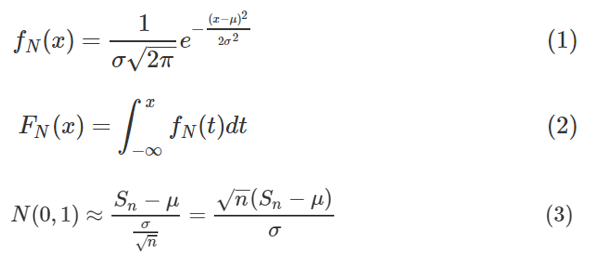

In [42]:
from IPython.display import Image
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\Montecarlo_1.png",
     width = 400)

sample_N(0,1) vs. N(0, 1): KS=0.0114 with p-value = 0.1499.


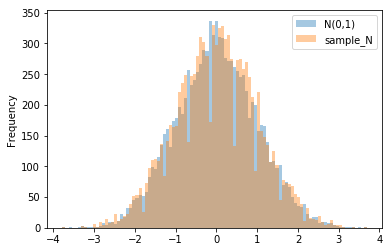

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import random
import pandas as pd
import math

N=10000
random.seed(123)

def bernoulli():
    return random.randint(0,1)

# Our sample function of N(0,1)
def sampleN_v1(N=2500):
    return 2.0 * math.sqrt(N) * (sum(bernoulli() for x in range(N)) / N - 0.5)

'''
Since our goal is to implement sampling from a normal distribution it would be nice to know if we actually did it 
correctly! One common way to test if two arbitrary distributions are the same is to use the Kolmogorov–Smirnov test
Use KS to test
'''
samples = [sampleN_v1() for x in range(N)]
test_stat, pvalue = stats.kstest(samples, 'norm', args=(0, 1), N=N)
print("sample_N(0,1) vs. N(0, 1): KS=%.4f with p-value = %.4f." % (test_stat, pvalue))

# Let's plot our samples against our reference distribution
reference = [stats.norm.rvs() for x in range(N)]
pd.DataFrame({'sample_N': samples, 'N(0,1)': reference}).plot(kind='hist', bins=100, alpha=0.4)
plt.show()

#### CASE2: using Box-Muller transform to sample from N(0,1)

One large downside of our CLT implementation is that it's slow. Boc-Muller Transform is much more efficient implementation that uses a "trick" to transform a pair of independent uniform random variables to a pair of independent normal random variables, which is way faster

The Box-Muller transform is a neat little "trick" that allows us to sample from a pair of normally distributed variables using a source of only uniformly distributed variables. The transform is actually pretty simple to compute. Given two independent uniformly distributed random variables  U1,U2  on the interval  (0,1) , we define two new random variables,  R  and  Θ   

Now using the standard transformation from polar coordinates  R,Θ  to Cartesian ones  X,Y , we claim that  X  and  Y  are independent standard normally distributed random variables  

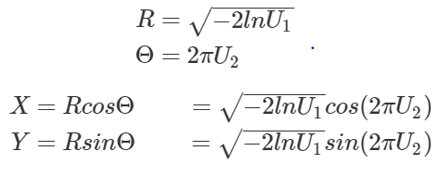

In [13]:
from IPython.display import Image
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\Montecarlo_2.png",
     width = 300)

sample_N(0,1) vs. N(0, 1): KS=0.0074 with p-value = 0.6372.


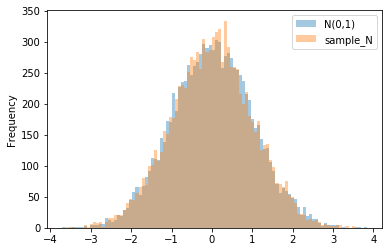

In [17]:
import sys
N=10000
random.seed(123)
epsilon = sys.float_info.epsilon

def box_muller():
    # Avoid getting u == 0.0
    u1, u2 = 0.0, 0.0
    while u1 < epsilon or u2 < epsilon:
        u1 = random.random()
        u2 = random.random()
        
    n1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    n2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return n1, n2


# Use KS to test
samples = [box_muller()[0] for x in range(N)]
test_stat, pvalue = stats.kstest(samples, 'norm', args=(0, 1), N=N)
print("sample_N(0,1) vs. N(0, 1): KS=%.4f with p-value = %.4f." % (test_stat, pvalue))

# Plot our samples against our reference distribution
reference = [stats.norm.rvs() for x in range(N)]
pd.DataFrame({'sample_N': samples, 'N(0,1)': reference}).plot(kind='hist', bins=100, alpha=0.4)

#### CASE3: This slightly out of topic but good simple monte carlso application: Calculate $\pi$ value

If a circle of radius R is inscribed inside a square with side length 2R, then the area of the circle will be $\pi * R^2$ and the area of the square will be $(2R)^2$. So the ratio of the area of the circle to the area of the square will be $\frac{\pi}{4}$

This program picks points at random inside the square. It then checks to see if the point is inside the circle (it knows it's inside the circle if $x^2 + y^2 < R^2$, where x and y are the coordinates of the point and R is the radius of the circle). The program keeps track of how many points it's picked so far (N) and how many of those points fell inside the circle (M).

There fore $ \pi = \frac{4*M}{N}$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def pi_montecarlo(N):
    plt.rcParams['figure.figsize'] = [4,4]
#     N= 1000
    x = np.random.uniform(low =-1 , high =1, size =[N,1])
    y = np.random.uniform(low =-1 , high =1, size =[N,1])

    points_inside_circle = x**2+y**2 <1
    approx_pi = (4*np.sum(points_inside_circle))/N
    print("ActualPi: {}, OurMonteCarlsoEstimatedPi: {}".format(np.pi,approx_pi))

    plt.scatter(x,y,s=1)
    plt.scatter(x[points_inside_circle],y[points_inside_circle],color ='r',s=1)
    plt.show()


ActualPi: 3.141592653589793, OurMonteCarlsoEstimatedPi: 3.132


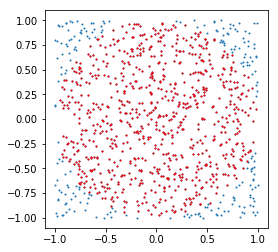

ActualPi: 3.141592653589793, OurMonteCarlsoEstimatedPi: 3.124


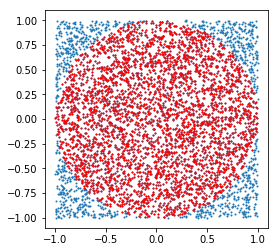

ActualPi: 3.141592653589793, OurMonteCarlsoEstimatedPi: 3.12


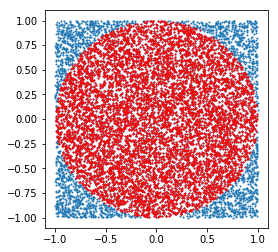

In [32]:
for i in [1000, 5000,10000]:
    pi_montecarlo(i)

### Markov Chains

One of the interesting application of markov chain is google's page ranking  

Markov chains, named after Andrey Markov, are mathematical systems that hop from one "state" (a situation or set of values) to another. For example, if you made a Markov chain model of a baby's behavior, you might include "playing," "eating", "sleeping," and "crying" as states, which together with other behaviors could form a 'state space': a list of all possible states. In addition, on top of the state space, a Markov chain tells you the probabilitiy of hopping, or "transitioning," from one state to any other state---e.g., the chance that a baby currently playing will fall asleep in the next five minutes without crying first.  

Good link to view Markov Chain in Action  
http://setosa.io/ev/markov-chains/

**A simple example of markov chain with just 2 states**  

List of things that one must know to understand basics of Markov Chanis
* what is steady state, do all markov chains have steady state?
* What is transition matrix? What is REGULAR transition Matrix?
* How to use Markov chain to predict probability of weather in future days? How to calculate a general probability of a weather any given day(Which is nothing but steady state)?

ANSWERS WITH EXAMPLE:  

The probabilities of weather conditions (modeled as either rainy or sunny), given the weather on the preceding day, can be represented by a transition matrix. Also, Notice that the rows of P sum to 1: this is because P is a stochastic matrix.

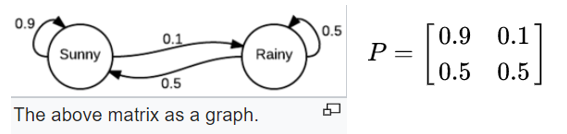

In [44]:
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\MCMC_1.png",
     width = 400)

Predicting Weather:  
The weather on day 1 is known to be sunny. This is represented by a vector in which the "sunny" entry is 100%, and the "rainy" entry is 0%:  
$ X^{(0)} = [1,0]   $

Let us predict now weather on day 2 and day 3 given the state on first day

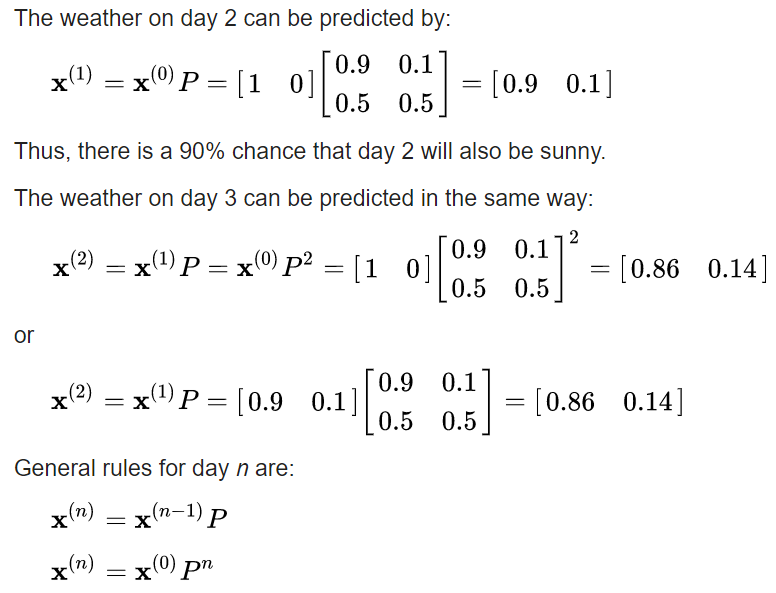

In [45]:
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\MCMC_2.png",
     width = 400)

Thes State Vector will eventually converge. But under the conition that transition matrix is a REGULAR TRANSITION MATRIX, then we will arrive at STEADY STATE VECTOR after a few iterations

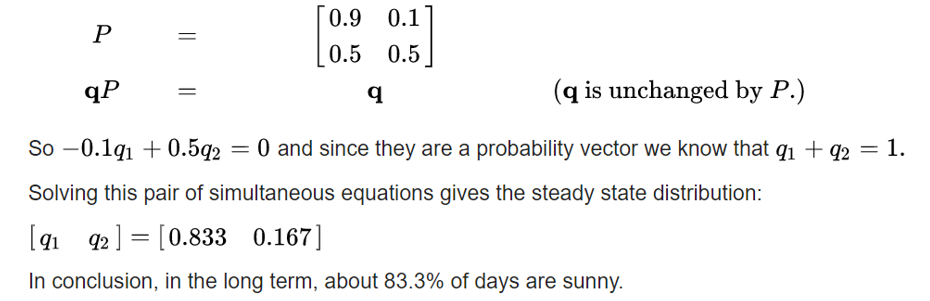

In [47]:
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\MCMC_3.png",
     width = 500)

**Simulating Markov Chain in Python**  
https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6  

Here we are training a markov chain to take speeches and then give a starting word and see what would the next sequence of words would be.

In [51]:
import numpy as np

# Trump's speeches here: https://github.com/ryanmcdermott/trump-speeches
trump = open('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\speeches.txt', 
             encoding='utf8').read()

corpus = trump.split()

def make_pairs(corpus):
    for i in range(len(corpus)-1):
        yield (corpus[i], corpus[i+1])
        
pairs = make_pairs(corpus)

word_dict = {}

for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]
 
first_word = np.random.choice(corpus)

while first_word.islower():
    first_word = np.random.choice(corpus)

chain = [first_word]

n_words = 50

for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

' '.join(chain)

'Japan", "Trump accepting people. We can turn on this. I haven’t done first. He didn\'t get things done. Well, I said them, I told you got to get attacked, we are one of the great Second Amendment is going to rebuild our country that’s okay. You know that kind of our'

**One more simple numeric example of Markov chain: This show how it converges to a STEADY STATE**

In [52]:
import numpy as np
from numpy import linalg as LA

def simulate_markov(x_0, P, k):
    for i in range(k):
        P_k = LA.matrix_power(P, i)
        x_k = np.dot(x_0, P_k)
        print("x^(%d) = [%.4f %.4f]" % (i, x_k[0], x_k[1]))
        
P = np.array([[0.9, 0.1], [0.5, 0.5]])
istate = np.array([1, 0])
        
simulate_markov(istate, P, 10)

x^(0) = [1.0000 0.0000]
x^(1) = [0.9000 0.1000]
x^(2) = [0.8600 0.1400]
x^(3) = [0.8440 0.1560]
x^(4) = [0.8376 0.1624]
x^(5) = [0.8350 0.1650]
x^(6) = [0.8340 0.1660]
x^(7) = [0.8336 0.1664]
x^(8) = [0.8334 0.1666]
x^(9) = [0.8334 0.1666]


## Markov Chain Mont Carlo Method: MCMC

Monte Carlo statistical methods, these methods are used to produce samples from a given distribution, with density f say, either to get an idea about this distribution, or to solve an integration or optimisation problem related with f.    

Markov chain Monte Carlo (MCMC) methods are extensions of i.i.d. simulations methods when i.i.d. simulation is too costly. They produce a sequence of simulations $(x_t)_t$ which limiting distribution is the distribution f.   

PROS   
* less information about f is needed to implement the method; 
* f may be only known up to a normalising constant or even as an integral and still be associated with an MCMC method; 
* there exist generic MCMC algorithms to produce simulations $(x_t)_t$ that require very little calibration; 
* dimension is less of an issue as large dimension targets can be broken into conditionals of smaller dimension (as in Gibbs sampling).   

CONS  
* the simulations $(x_t)_t$ are correlated, hence less informative than i.i.d. simulations; 
* the validation of the method is only asymptotic, hence there is an approximation in considering x_t for a fixed t as a realisation of f;
* convergence to f (in t) may be slow 
* the universal validation of the method means there is an infinite number of potential implementations, with an equally infinite range of efficiencies.  

**Few commonly used Monte Carlo and MCMC (Markov chain monte carlo methods)**  

Monte Carlo Methods:  
* Simple Monte Carlo Sampling
* Rejection Sampling
* Importance Sampling

Markov Chain Monte Carlo Methods:
* Gibbs Sampling
* Metropolis Algorithm ( Where some basic building blocks are like acceptance, cuurent state, next state : good link http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/)
* Hybrid Monte Carlo

#### AWESOME WAY TO SIMPLY EXPLAIN MCMC: 
Markov Chain Monte Carlo (MCMC) methods are simply a class of algorithms that use Markov Chains to sample from a particular probability distribution (the Monte Carlo part). They work by creating a Markov Chain where the limiting distribution (or stationary distribution) is simply the distribution we want to sample.

Here's a picture that might help describe the process. Imagine we're trying to make a MCMC to try to sample an arbitrary one dimensional distribution with PDF  f(x) . In this case, our states would be points along the  x -axis and our transition probabilities would be the chance of going from one state to another. Here's a simplified figure of the situation:

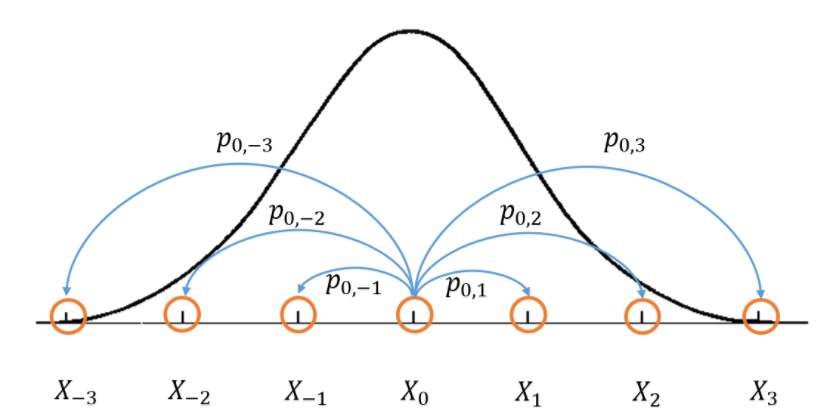

In [53]:
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\Statistics_R-Python\\images\\MCMC_4.png",
     width = 500)

This figure shows the density function we're trying to approximate with the thick black line, and a visualization of part of the Markov Chain using the blue lines transitioning from orange states. In particular, just the transitions from state  X0  to  Xi  for i={−3,−2,−1,1,2,3} . However, each point on the x-axis line is actually a potential state in this Markov Chain. Notice that this means that we have an infinite state space, thus we can't represent the transitions nicely as a matrix anymore. The real "trick" to MCMC methods is that we want to design the transition probabilities between states (or points on the x-axis) such that we spend most of our time in regions where  f(x)  is large, and relatively small amounts of time in regions where it is small (i.e. in the exact proportions to our density function).  

Now the proportionate number of times we spend at each point x-axis should be an approximation of the PDF we're trying to simulate i.e. if we plot the histogram of x-values, we should get the same shape. Note that there is an extra step that is required. This is because when transitioning from state  x  to  x′  the points are obviously correlated (the probability of going to  x′  depends on the current state  x ). However, when sampling we want independent samples. So we basically throw away a bunch of our samples in order to ensure we get independent samples. The value of  T  has to be picked depending on the details of our target distribution and the construction of the transition probabilities.  

## Monte Carlo Method:Example: Rejection Sampling: Python Sample Code

Now before we get into a concrete algorithm for MCMC methods, I want to introduce another method for sampling a probability distribution that we'll be using later called rejection sampling. The main idea is that if we're trying to sample from a distribution  f(x) , we'll use another instrumental distribution,  g(x) , to help sample from  f(x) . The only restriction is that $f(x)<Mg(x)$ for some  $M>1$ . It's primary use is when the form of  f(x)  makes it hard to sample with directly (but still possible to evaluate it at any point  x ).

Here's a breakdown of the algorithm:

1. Sample  x  from  g(x) .
2. Sample  y  from  U(0,Mg(x))  (uniform distribution).
3. If  y<f(x) , then accept  x  as a sample for  f(x) , otherwise go to step 1.

CODE BACKGROUND: Our target distribution,  f(x) , that we want to sample from is double gamma distribution, basically a two-sided gamma distribution. We'll be using a normal distribution,  g(x) , as our envelope distribution. The code below shows us how to find the scaling constant  M  as well as draws us a picture of how the rejection sampling conceptually works.

C:\Users\Ashlesh B Shetty\Anaconda2\envs\starterbot\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


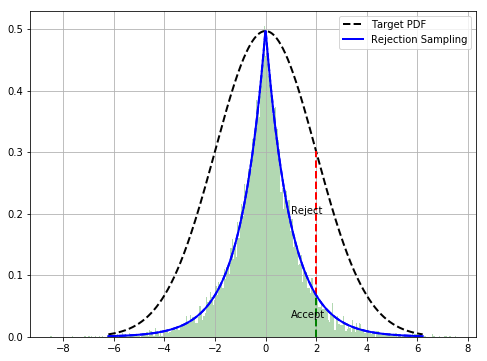

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Target = double gamma distribution
# Envelope = normal distribution 
dg = stats.dgamma(a=1)
norm = stats.norm(loc=0, scale=2)

# Generate samples for PDF
x = np.linspace(min(dg.ppf(0.001), norm.ppf(0.001)), 
                max(dg.ppf(0.999), norm.ppf(0.999)), 1000)
dg_samples = dg.pdf(x)
norm_samples = norm.pdf(x)

# Find scaling constant for envelope 
M = max(dg_samples / norm_samples)

# Plot
df = pd.DataFrame({'Target': dg_samples, 'Envelope': M * norm_samples}, index=x)
ax = df.plot(style=['--', '-'], color=['black', 'blue'], 
             figsize=(8,6), linewidth=2.0)
ax.plot((2, 2), (0, dg.pdf(2)), 'g--', linewidth=2.0)
ax.plot((2, 2), (dg.pdf(2), M * norm.pdf(2)), 'r--', linewidth=2.0)
ax.text(1.0, 0.20, 'Reject')
ax.text(1.0, 0.03, 'Accept')

def rejection_sampling():
    while True:
        # Re-use global parameters from above
        x = np.random.normal(0, 2)
        envelope = M * norm.pdf(x)
        p = np.random.uniform(0, envelope)
        if p < dg.pdf(x):
            return x

# Generation samples from rejection sampling algorithm
samples = [rejection_sampling() for x in range(10000)]

# Plot Histogram vs. Target PDF
df['Target'].plot(color='blue', style='--', figsize=(8,6), linewidth=2.0)
pd.Series(samples).hist(bins=300, normed=True, color='green', 
                        alpha=0.3, linewidth=0.0)
plt.legend(['Target PDF', 'Rejection Sampling']) 
plt.show()

In [58]:
M

2.4910954204203879

## MCMC-Markov Chain Monte Carlo Method:Example:  Metropolis-Hastings Algorithm: Python Sample Code

So the overall algorithm would be (which matches closely to the MCMC algorithm above):

1. Initialize the initial state by picking a random  x .
2. Find new  x′  according to  g(x→x′) .
3. Accept  x′  with uniform probability according to  A(x→x′) . If accepted transition to  x′ , otherwise stay in state  x .
4. Go to step 2, T times.
5. Save state  x  as a sample, go to step 2 to sample another point.


**Burn-In and Correlated Samples**  
Before we move on to the implementation, we need to talk about two very important topics with respect to MCMC methods. 

1. The first topic relates to the initial state we pick. Since we randomly pick a value for  x , it's quite possible that it is in a region where  p(x)  is quite small (think the tail ends of our double gamma distribution). If it starts here, it might spend a disproportionate amount of time traversing through  x  values with low density, thus incorrectly giving us the sense that these  x  values should occur more often then they do. So the solution to this is to "burn-in"(The term burn-in is taken from the corresponding concept where physical components are exercised prior to being put in production in order to sort out any of the potentially flawed components) the sampler by generating a bunch of samples and throwing them away. The number of samples will depend on the specifics of the distribution we're trying to simulate.

2. The second problem, which we mentioned above, is the correlation between two adjacent samples. Since by definition of our transition function  P(x→x′) , drawing  x′  is dependent on current state  x . Thus, we lose one vital property of our samples: independence. To correct for this, we draw  Tth  samples, and only record the last one drawn. Assuming  T  is large enough, the samples should be relatively independent. Like the burn-in, the value of  T  depends on the target and proposal distribution.  

**Implementing the Metropolis-Hastings Algorithm**  
Let's use our example from above of a double gamma distribution. And let's define our proposal distribution as a normal distribution centered at  x  and standard deviation  2 , N(x, 2) (remember  x  is given as the current state):

$ g(x→x′)=fN(x,2)(x) $  

Given  f(x)  proportional to our underlying distribution  p(x)  our accepting distribution looks like this:  
$A(x→x′)=min(1,\frac{f(x′)fN(x′,2)(x)}{f(x)fN(x,2)(x′))}=min(1,\frac{f(x′)}{f(x)})$  

since the normal distribution is symmetric, the PDFs of the normal distributions cancel out when evaluated at their respective points. Now let's take a look at some code:

C:\Users\Ashlesh B Shetty\Anaconda2\envs\starterbot\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


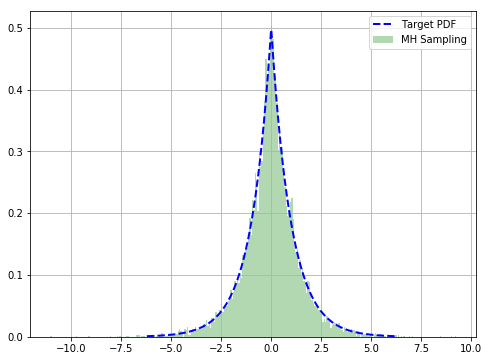

C:\Users\Ashlesh B Shetty\Anaconda2\envs\starterbot\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


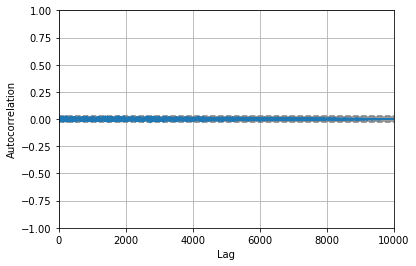

In [60]:
import math
from pandas.tools.plotting import autocorrelation_plot

# Simulate a f(x) proportional to the double gamma distribution
f = lambda x: dg.pdf(x) * math.pi

def mh_sampler(T=100):
    T=100
    x_curr = np.random.rand()
    while True:
        for i in range(T):
            x_next = np.random.normal(x_curr, 2)
            if min(1, f(x_next) / f(x_curr)) > np.random.uniform(0, 1):
                x_curr = x_next
        yield x_curr

# Burn-in
sampler = mh_sampler()
for x in range(1000):
    next(sampler)

# Sample
samples = [next(sampler) for x in range(10000)]

# Plot Histogram vs. Target PDF
df['Target'].plot(color='blue', style='--', figsize=(8,6), linewidth=2.0)
pd.Series(samples).hist(bins=300, normed=True, color='green', 
                        alpha=0.3, linewidth=0.0)
plt.legend(['Target PDF', 'MH Sampling'])
plt.show()

# Plot autocorrelation to ensure samples are independent
autocorrelation_plot(pd.Series(samples))

As we can see visually, the samples from our MH sampler are a good approximation to our double gamma distribution. Additionally, looking at the autocorrelation plot, we can see that it's quite small across our entire sample, indicating that they are relatively independent. If we had not picked a good value for T or not had a burn-in period, we would we would likely see large values in the plot.  

## Awesome links for motivation
http://www.stat.cmu.edu/~larry/=sml2008/lect2.pdf  
https://courses.cs.washington.edu/courses/cse577/04sp/notes/dellaertUW.pdf  
https://stackoverflow.com/questions/16424050/differences-between-monte-carlo-and-markov-chains-techniques  
http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/  
https://ermongroup.github.io/cs228-notes/inference/sampling/  
http://www.austintek.com/bayes/
https://stats.stackexchange.com/questions/165/how-would-you-explain-markov-chain-monte-carlo-mcmc-to-a-layperson  
http://bjlkeng.github.io/posts/markov-chain-monte-carlo-mcmc-and-the-metropolis-hastings-algorithm/  
http://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/  